In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from urllib.request import urlopen
from tempfile import NamedTemporaryFile
import pathlib
import os

In [2]:
# Datos sacados de https://github.com/jorgeperezrojas/covid19-data/tree/master/csv/muertes_deis
path = pathlib.Path().absolute()
deaths_file = 'https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/muertes_deis/muertes_deis_rm.csv'
deaths_data = pd.read_csv(deaths_file, index_col=1)
deaths_data

,comuna,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
año,,,,,,,,,,,,,
2020,Alhué,4.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,Alhué,2.0,NaN,5.0,3.0,2.0,6.0,2.0,NaN,4.0,3.0,4.0,5.0
2018,Alhué,1.0,2.0,2.0,8.0,1.0,5.0,1.0,4.0,8.0,6.0,3.0,NaN
2017,Alhué,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0,6.0,1.0,2.0,2.0
2016,Alhué,5.0,NaN,1.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Vitacura,25.0,33.0,31.0,33.0,35.0,40.0,46.0,39.0,28.0,37.0,35.0,30.0
2003,Vitacura,27.0,29.0,31.0,26.0,44.0,30.0,27.0,42.0,33.0,49.0,31.0,34.0
2002,Vitacura,29.0,26.0,33.0,26.0,34.0,40.0,35.0,25.0,40.0,35.0,24.0,37.0


In [3]:
comunas = deaths_data['comuna'].unique()
comunas

array(['Alhué', 'Buin', 'Calera de Tango', 'Cerrillos', 'Cerro Navia',
       'Colina', 'Conchalí', 'Curacaví', 'El Bosque', 'El Monte',
       'Estación Central', 'Huechuraba', 'Independencia',
       'Isla de Maipo', 'La Cisterna', 'La Florida', 'La Granja',
       'La Pintana', 'La Reina', 'Lampa', 'Las Condes', 'Lo Barnechea',
       'Lo Espejo', 'Lo Prado', 'Macul', 'Maipú', 'María Pinto',
       'Melipilla', 'Ñuñoa', 'Padre Hurtado', 'Paine',
       'Pedro Aguirre Cerda', 'Peñaflor', 'Peñalolén', 'Pirque',
       'Providencia', 'Pudahuel', 'Puente Alto', 'Quilicura',
       'Quinta Normal', 'Recoleta', 'Renca', 'San Bernardo',
       'San Joaquín', 'San José de Maipo', 'San Miguel', 'San Pedro',
       'San Ramón', 'Santiago', 'Talagante', 'Tiltil', 'Vitacura'],
      dtype=object)

In [4]:
# FONTS
roboto_url = 'https://github.com/google/roboto/blob/master/src/hinted/Roboto-Regular.ttf'
lato_url = 'https://github.com/google/fonts/blob/master/ofl/lato/Lato-Regular.ttf'
font_file = '?raw=true'
roboto_url = roboto_url + font_file  # You want the actual file, not some html
lato_url = lato_url + font_file

response = urlopen(roboto_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
roboto = fm.FontProperties(fname=f.name)

response = urlopen(lato_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
lato = fm.FontProperties(fname=f.name)

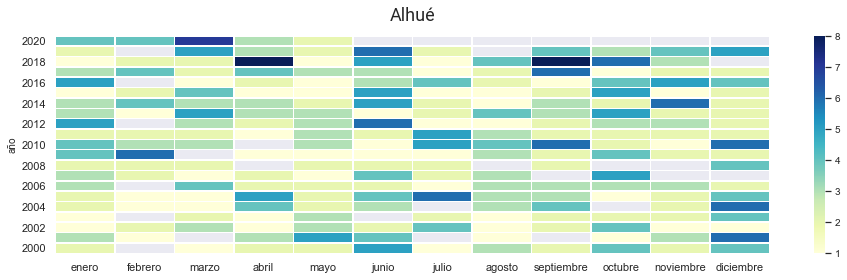

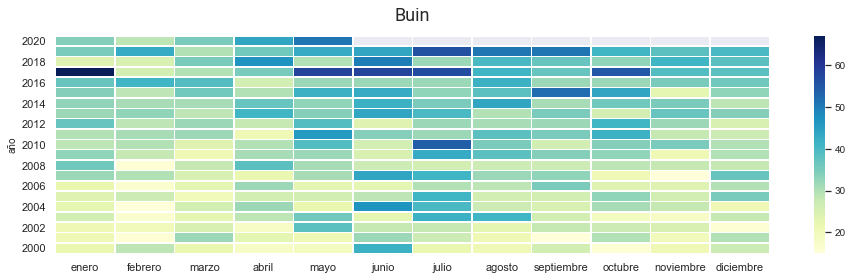

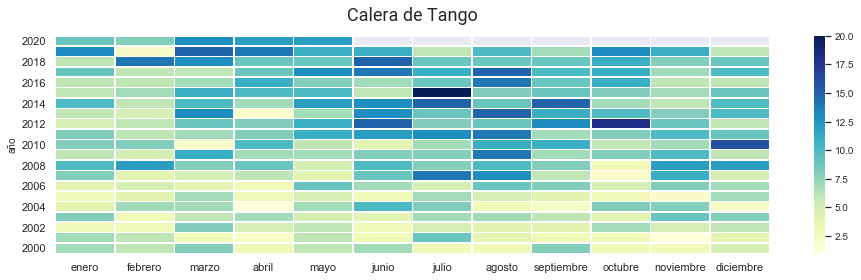

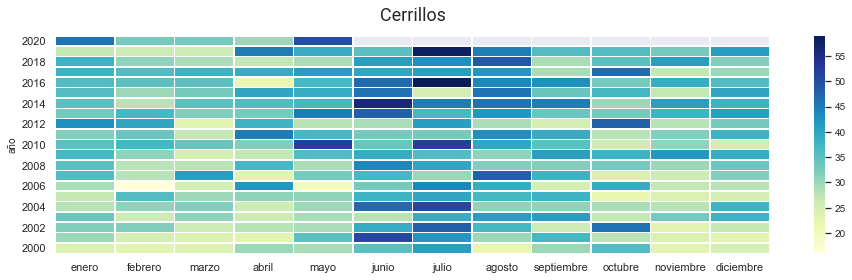

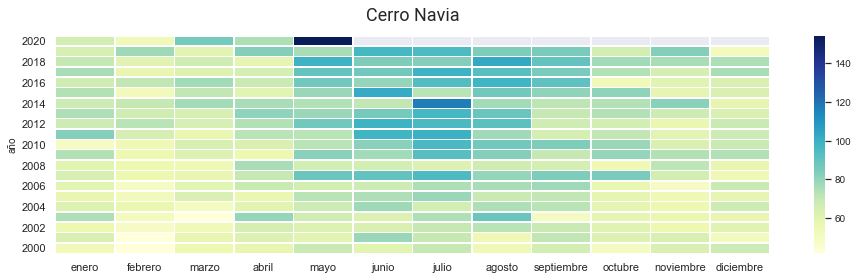

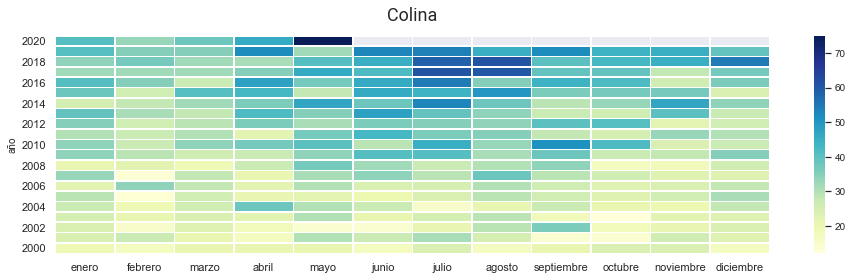

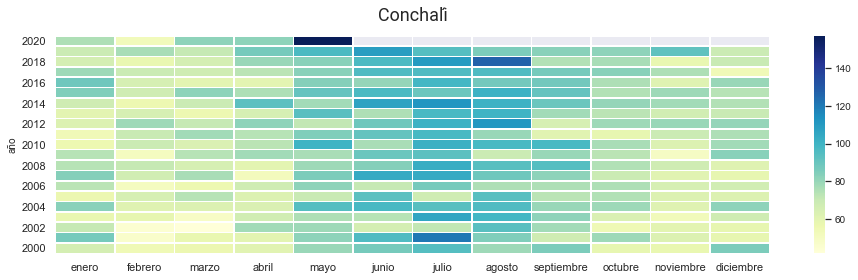

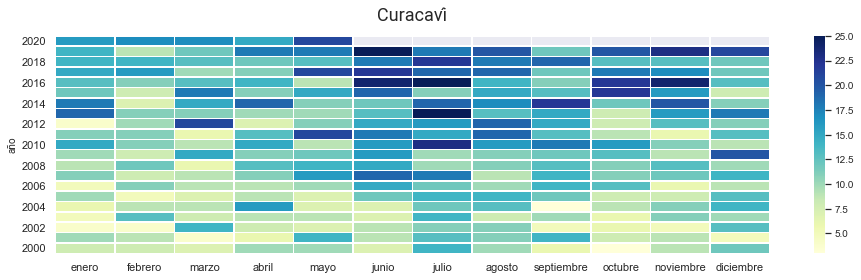

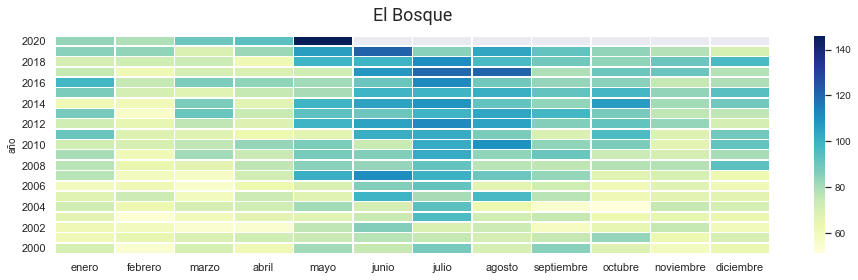

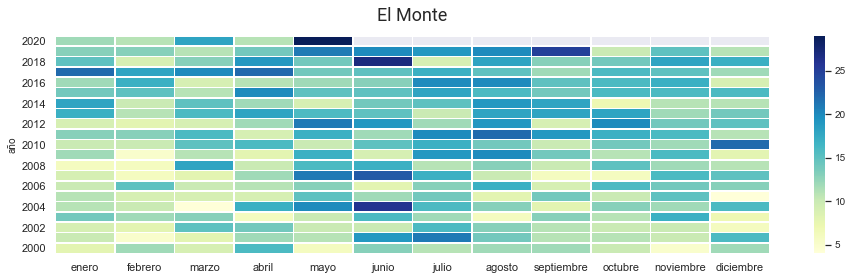

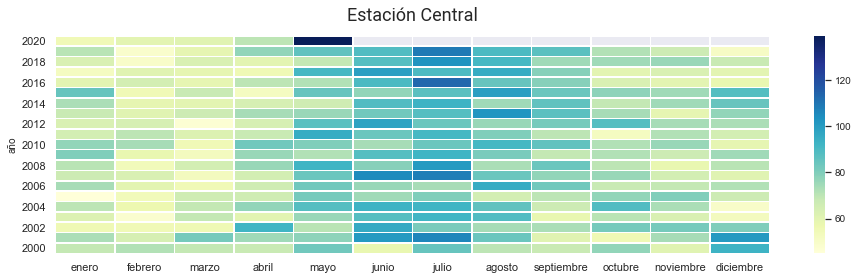

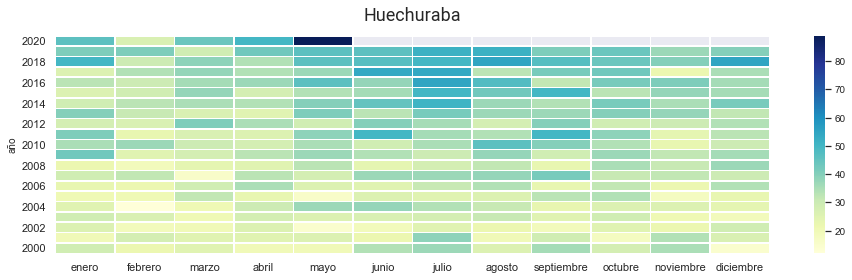

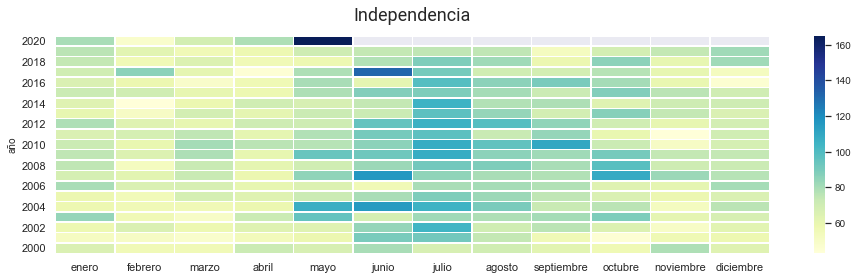

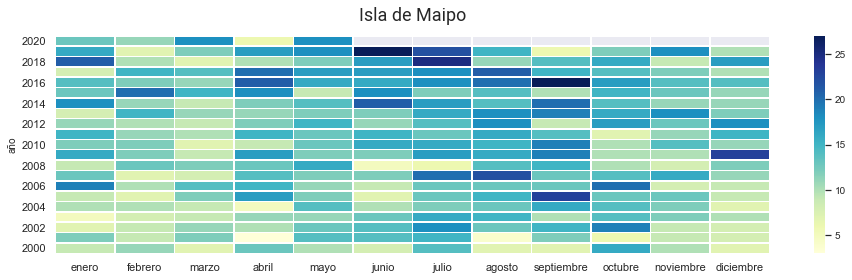

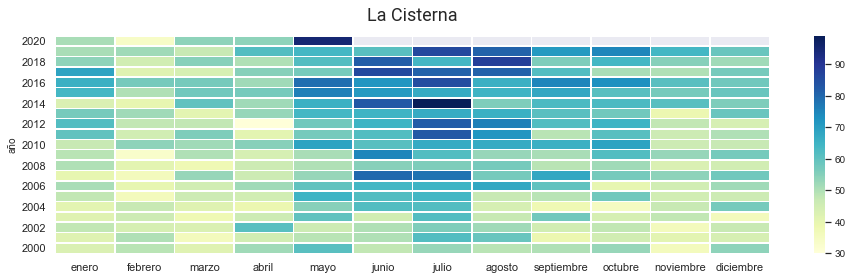

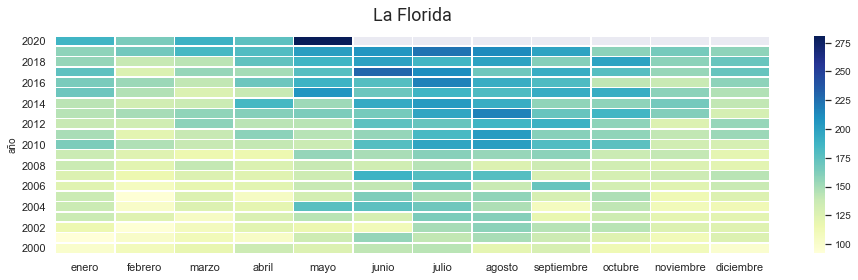

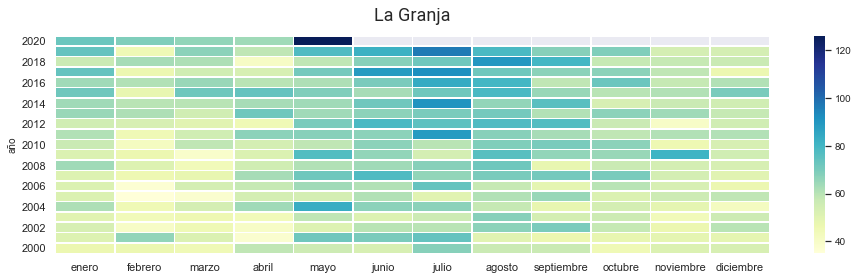

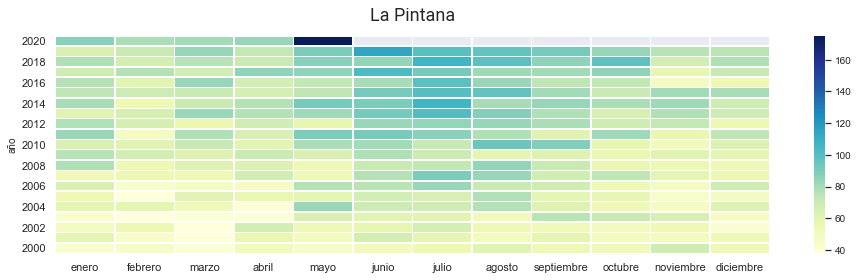

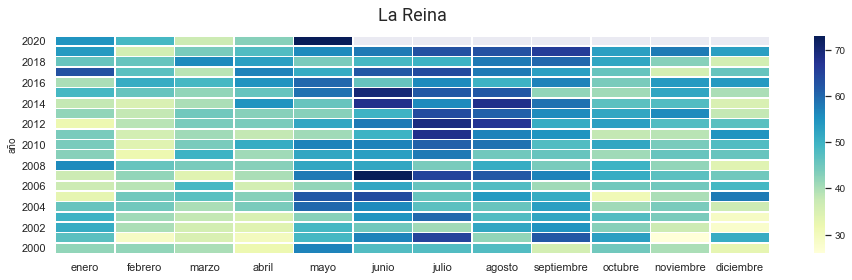

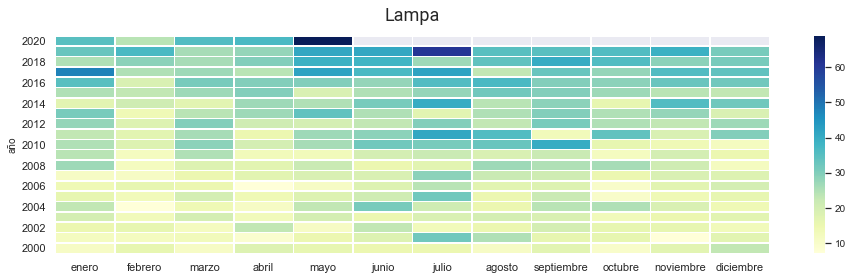

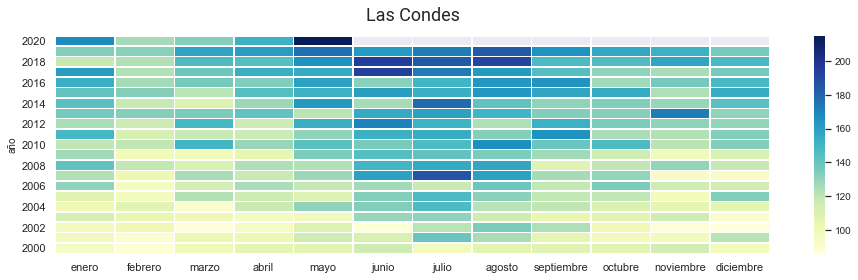

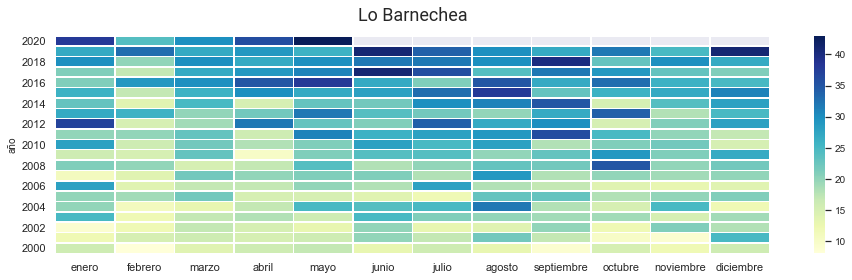

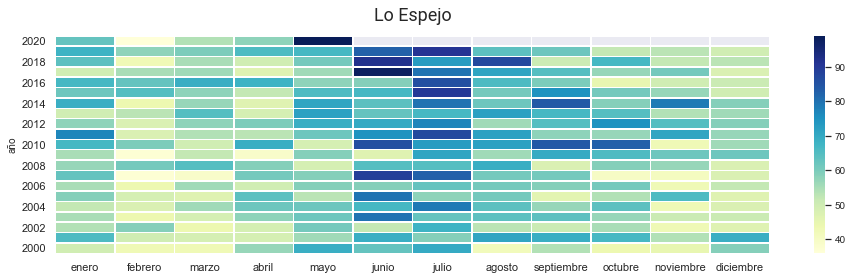

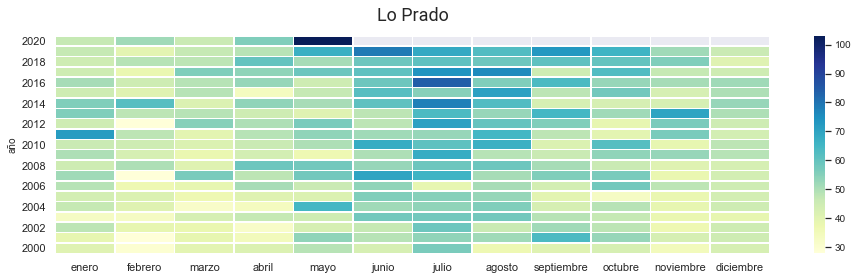

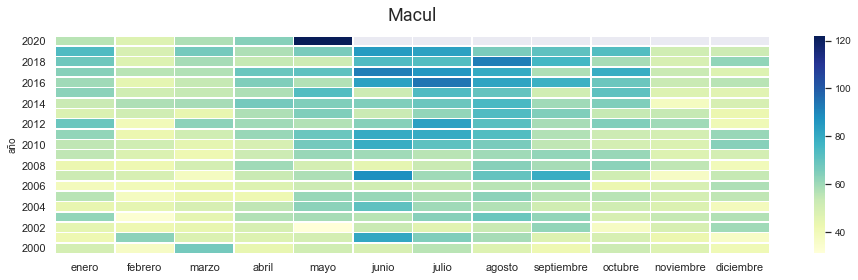

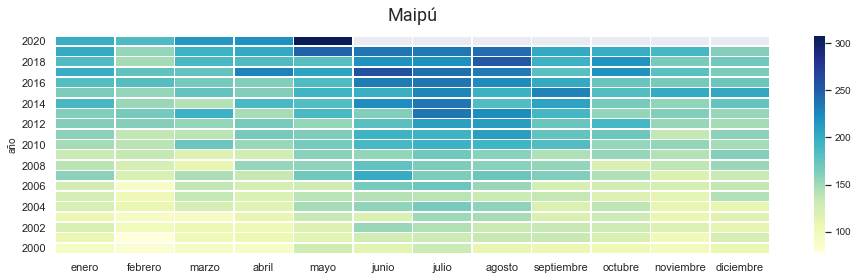

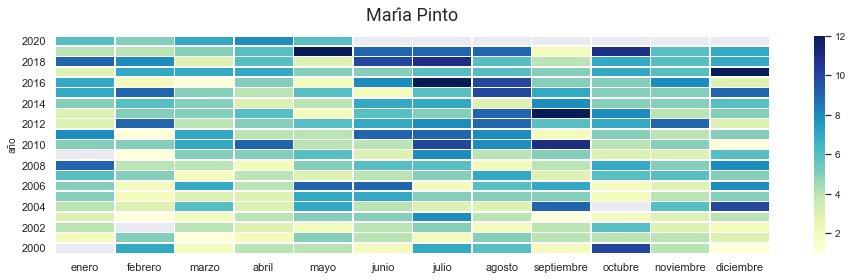

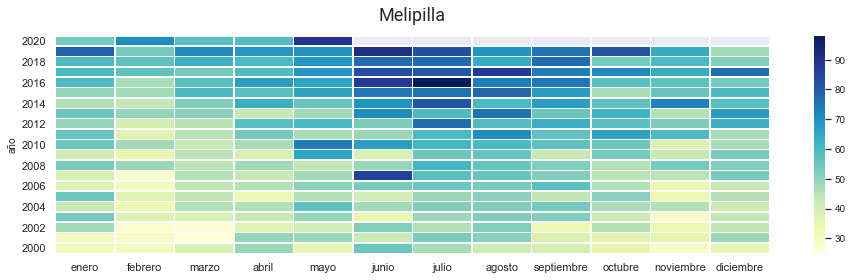

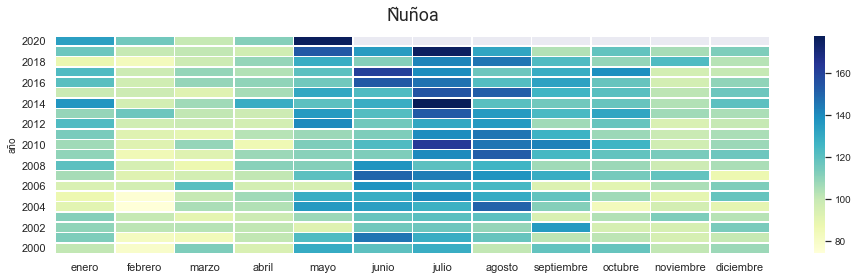

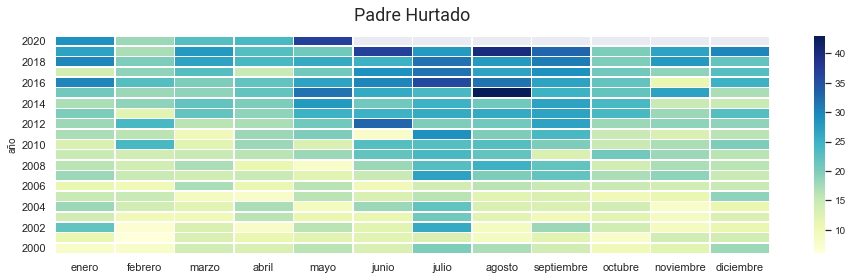

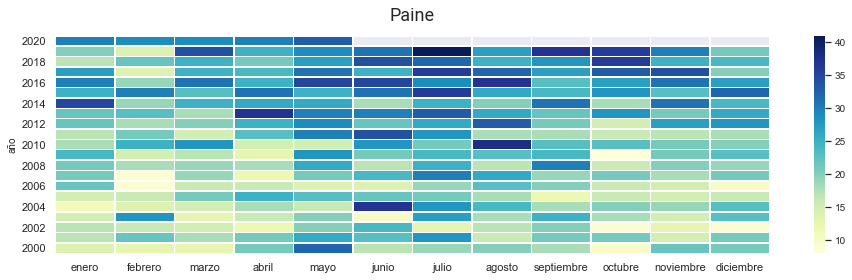

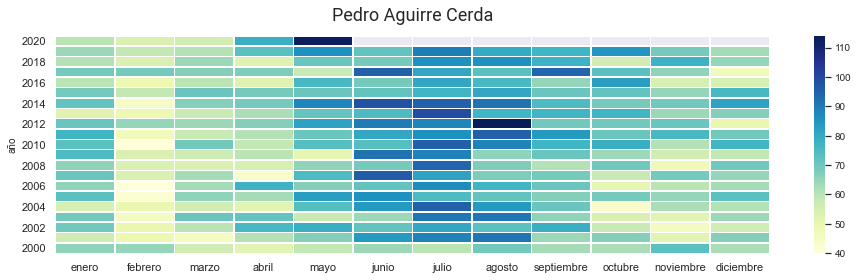

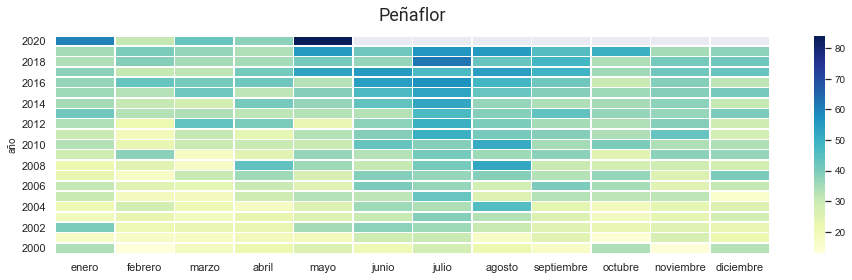

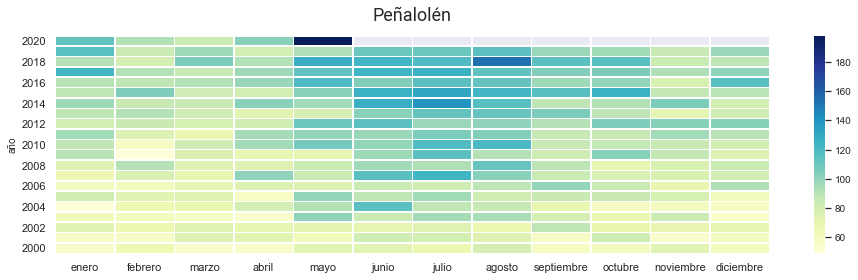

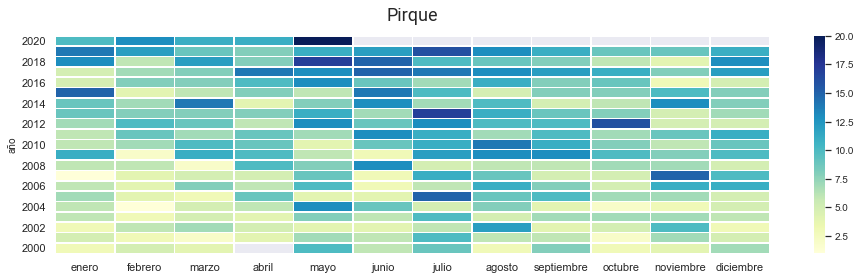

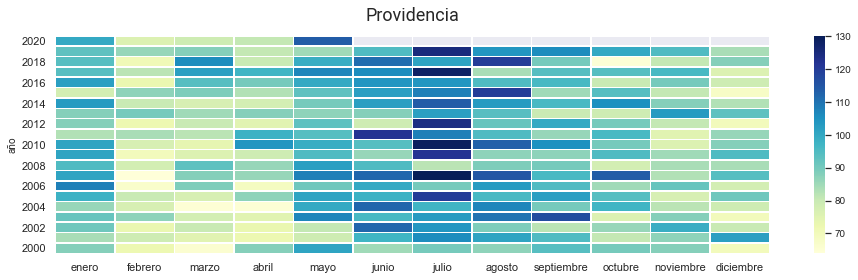

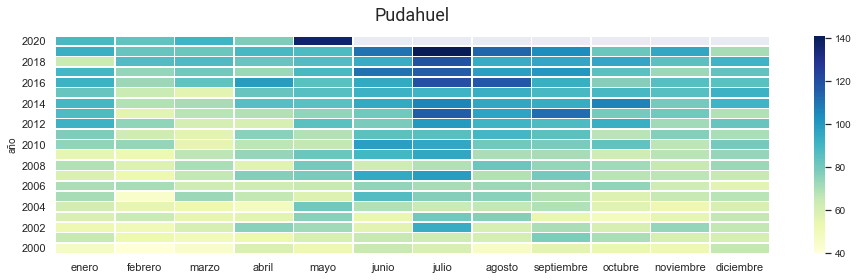

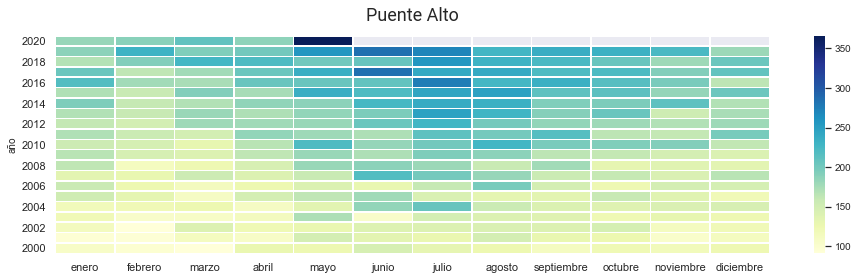

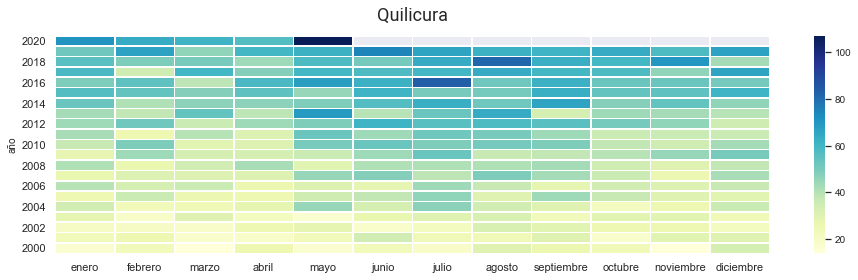

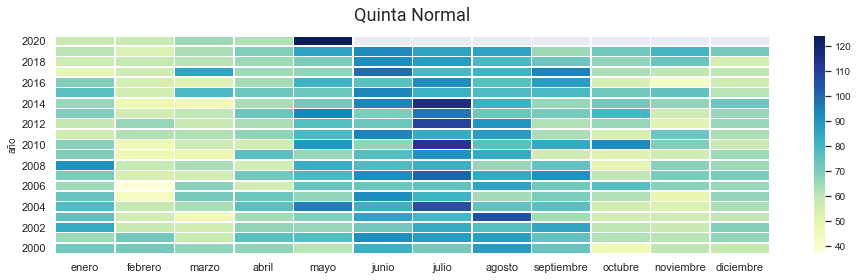

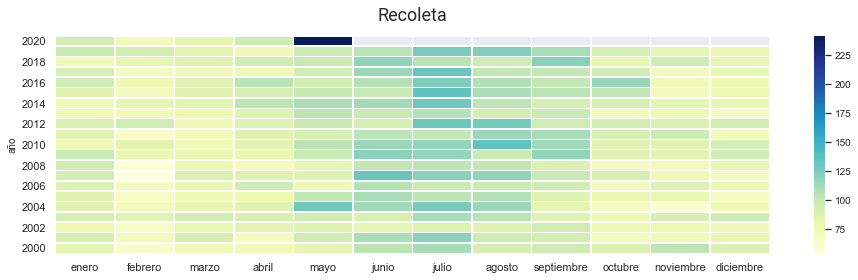

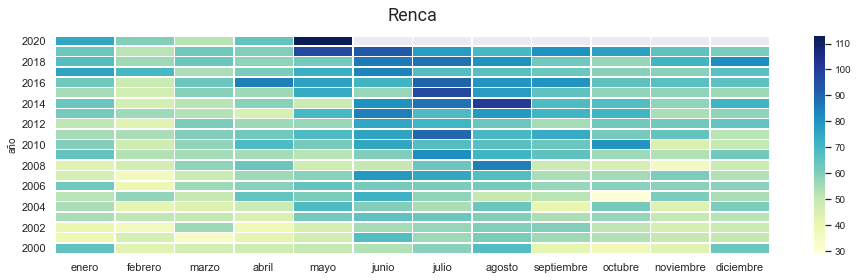

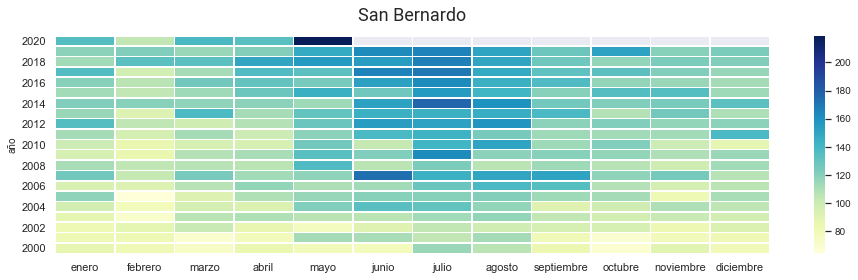

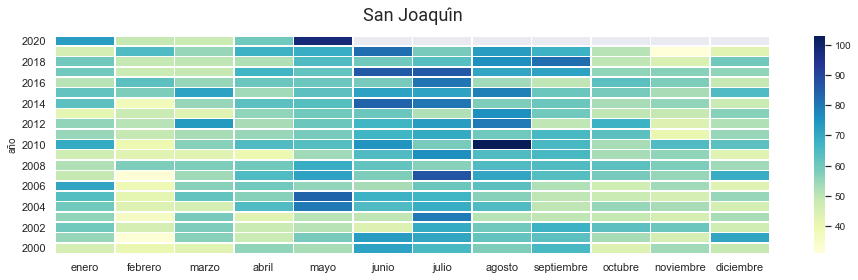

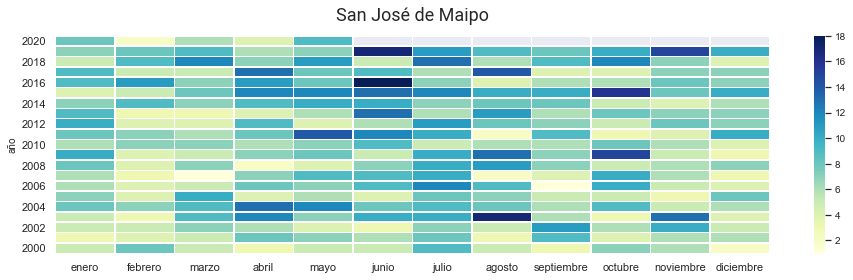

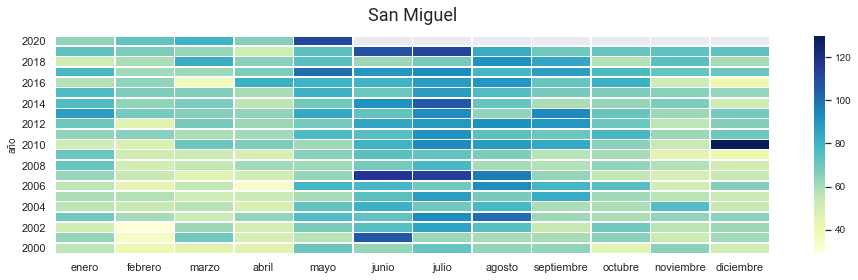

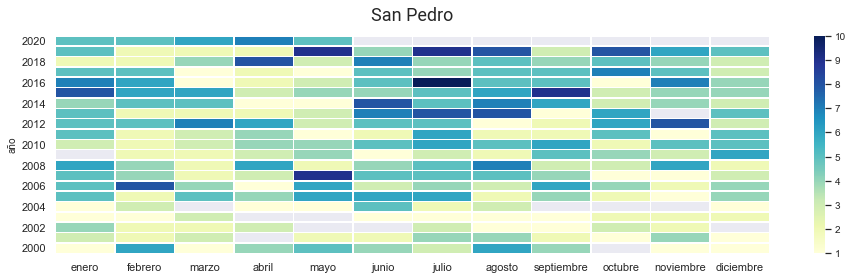

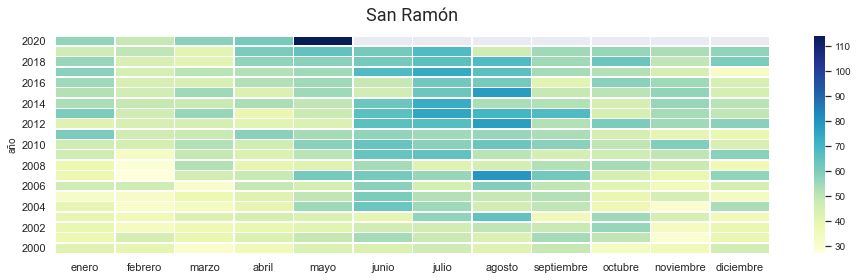

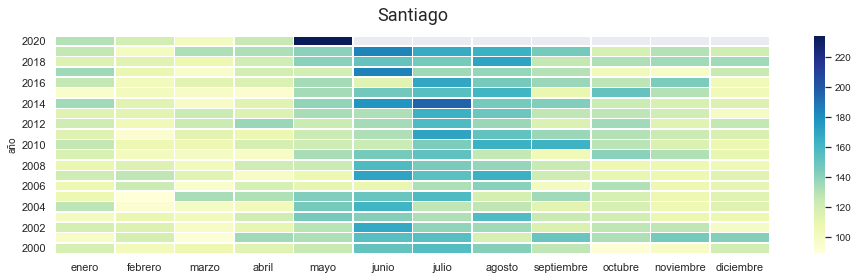

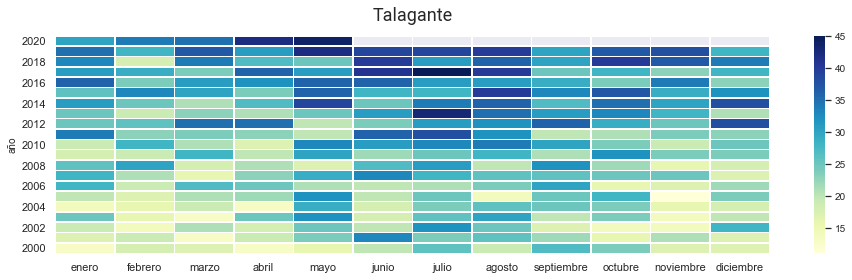

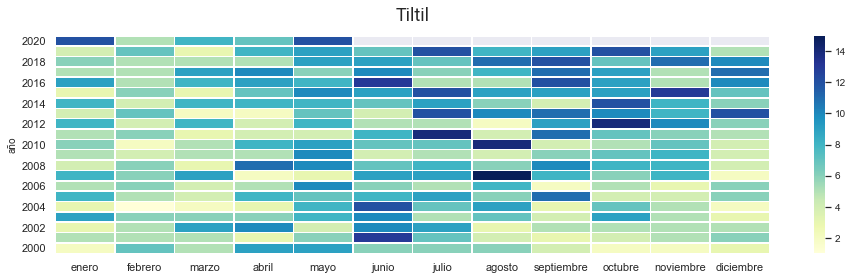

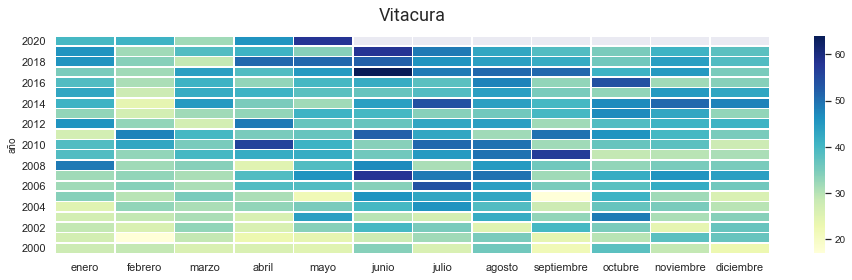

In [5]:
sns.set(font_scale=1)
fig_path = os.path.join(path, "figuras/decesos_historicos")

for comuna in comunas:
    plt.figure(figsize=(16,4))
    filtered = deaths_data[deaths_data['comuna'] == comuna]
    data_comuna = filtered.drop(['comuna'], axis=1)

    ax = sns.heatmap(data_comuna, linewidth=0.5, cmap="YlGnBu")

    ax.set_xlabel(ax.get_xlabel(), fontproperties=roboto)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=roboto)
    ax.set_title(comuna, fontproperties=roboto, fontsize=18, pad=15)
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.savefig(os.path.join(fig_path, comuna + '.png'), dpi=200)
    plt.show()